# Gaussian Mixture

In this notebook we will explore Gaussian Mixture Model. We will first apply it to high-dimensional Winsconsin breast cancer dataset and compare it to K-means clustering. Then we will also apply it to segmentation of brain MRI into White Matter (WM), Gray Matter (GM) and Cerebro-spinal Fluid (CSF), and explore its various components, such as image and class intensity distributions, also called **likelihoods**, and resulting probabilistic predictions, also called **posteriors**. 

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Load Breast Cancer Dataset

We will first load the dataset and create the feature matrix `X` and the label vector `y`. Note that the label vector will only be used for evaluation of the clustering result, because clustering is an unsupervised machine learning task.

In [2]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

print('\n Features: \n', bc.feature_names)
print('\n Labels: ', bc.target_names)

# Feature matrix
X = bc.data
# Label vector
y = bc.target
print('\n We have {} features.'.format(X.shape[1]))


 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']

 We have 30 features.


You have seen in this module that we can use dimensionality reduction to visualise structure of the high-dimensional dataset. We will use `PCA` to visualise our 30-dimensional dataset.

**Activity 1:** Complete the code below to explore structure of the Wisconsin Breast Cancer Dataset.

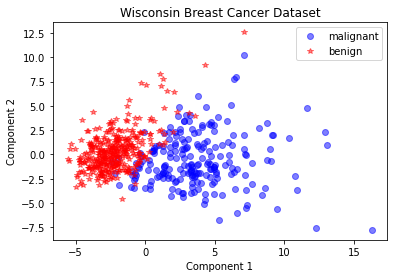

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# apply standard scaler to the feature matrix
X = StandardScaler().fit_transform(X)

# create PCA feature transformer with 2 components
model = PCA(n_components = 2)

# transform features using PCA
X2 = model.fit_transform(X)

# create function for plotting 2D two-class dataset
def PlotData(X,y):
    # plot
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.5, label = bc.target_names[0])
    plt.plot(X[y==1,0],X[y==1,1],'r*',alpha=0.5, label = bc.target_names[1])
    # annotate
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Wisconsin Breast Cancer Dataset')

# Plot reduced dataset
PlotData(X2,y)

### K-means clustering

Let's cluster the dataset using K-means and see how it well it can distinguish natural clusters in the dataset and whether these clusters correpond to the heathy and cancerous cells.

**Activity 2:** Complete the code below to perform k-means clustering with 2 clusters and evaluate the accuracy compared to the ground truth labels. Did the 30D model perform better than the 2D models in the lecture? 

*Note: We need to print out two different scores because the clusters will be assigned labels 0 or 1 randomly. The higher score will be the measure of the performance.*

**Answer:** K-means clustering achieved accuracy 0.91, which is higher than in the lectures. This can be because of larger number of features or because we used standard scaler which resulted in rounder clusters, needed for K-means clustering.


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

# Create k-means model with 2 clusters
model = KMeans(n_clusters=2)

# Fit the model and predict the labels
y_pred = model.fit_predict(X)

# Print out accuracy score compared to ground truth labels
print('Accuracy score: ', round(accuracy_score(y,y_pred),2))
print('Accuracy score: ', round(accuracy_score(y,1-y_pred),2))

Accuracy score:  0.09
Accuracy score:  0.91


We will now plot the clustering result. 

**Activity 3:** Call the function `PlotData` with the predicted labels. Compare to the ground truth labels plotted above.

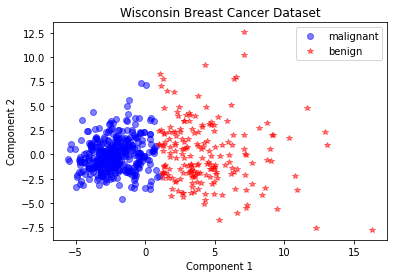

In [5]:
# Plot the clustering result
PlotData(X2,y_pred)

## Exercise 1 
### Clustering high-dimensional dataset using Gaussian Mixture

Your task is now to fit Gaussian Mixture model to the 30D dataset and compare it performance to the K-means. Perform following tasks:
* Create GMM model with 2 clusters
* Fit the model and predict the labels
* Print out accuracy score compared to ground truth labels
* Plot the clustering result
Which method performed better. Can you reason why?

**Answer:** Gaussian Mixture performed better probably because it recognised that elongated clusters.

Accuracy score:  0.06
Accuracy score:  0.94


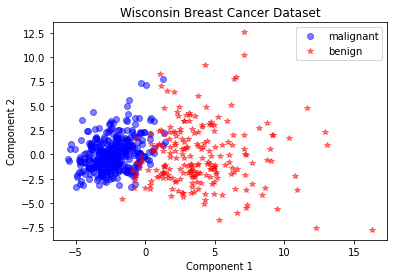

In [6]:
from sklearn.mixture import GaussianMixture

# Create GMM model with 2 clusters
model = GaussianMixture(n_components=2)

# Fit the model and predict the labels
y_pred = model.fit_predict(X)

# Print out accuracy score compared to ground truth labels
print('Accuracy score: ', round(accuracy_score(y,y_pred),2))
print('Accuracy score: ', round(accuracy_score(y,1-y_pred),2))

# Plot the clustering result
PlotData(X2,y_pred)

### Load brain MRI
Our 2D brain MRI image is saved in a pickle format as 'slice.p'. The non-brain tissue has been removed and image has been padded with zeros. When performing GMM clustering to segment the WM, GM and CSF, we will need to exclude the zero values for the algorithm to work well. 

Run the code bellow to load and plot the brain MRI slice.

Slice dimesions:  (229, 193)


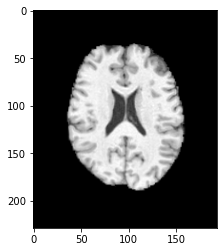

In [7]:
import pickle
slice = pickle.load(open( "datasets/slice.p", "rb" ))
print('Slice dimesions: ',slice.shape)

plt.imshow(slice)
plt.set_cmap('gray')

Let's now first plot the histogram of this image. We see the large peak of zero values which is the padding of the background.

*Note: we use* `_=plt.hist` *because we do not want the histogram values to be printed*

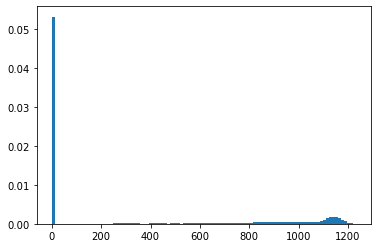

In [8]:
# display histogram
_=plt.hist(slice.flatten(), bins = 100, density = True)

We need to exclude the padding to make the GMM segmentation work well. We therefore select only non-zero elements and plot histogram of these. This can be done using function `np.where` (otherwise remebering the logistic array `slice>0` is fine too). Note that `slice2`, which contains the selected pixels is now a 1D array. 

Can you recognise the peaks of WM, GM and CSF?

Shape od selected data is  (15340,)


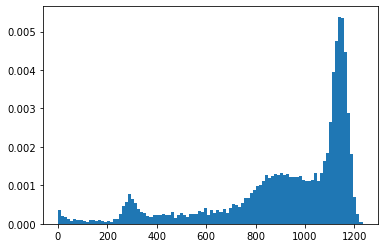

In [9]:
# find indices of non-zero elements
ind = np.where(slice>0)
# select non-zero elemenst
slice2 = slice[ind]
# check the dimension
print('Shape od selected data is ', slice2.shape)
# plot histogram
_=plt.hist(slice2, bins = 100, density = True)

## Exercise 2
### Segmentation of brain MRI using Gaussian mixture

__Task 2.1:__ Now perform clustering of `slice2` using `GaussianMixture`. Set number of clusters to `3` and random state to `42` to get the same result every time you rerun it. Check help how exactly to do that. Perform following tasks:
* Create the `GausianMixture` model
* Create the feature matrix `X` by reshaping `slice2` into 2D array
* Fit the model and predict the labels
* Reshape the predicted labels to the original shape of `slice`
* Display using `imshow`

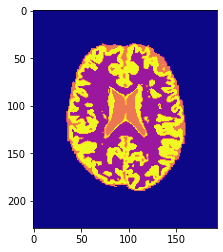

In [10]:
from sklearn.mixture import GaussianMixture

# select model
model=GaussianMixture(n_components=3)

# create features - needs to be a 2D array
X = slice2.reshape(-1,1)

# fit the model and predict the cluster labels 
y_pred = model.fit_predict(X)

# Create array of 2D labels
labels2D = np.zeros(slice.shape)

# put the labels into fields with non-zero indices
labels2D[ind]=y_pred+1

# display the label image
plt.imshow(labels2D)
plt.set_cmap('plasma')

**Task 2.2:** Predict the probabilistic segmentations for each tissue class.  Display the maps in a figure with three subplots. 

To do that perform the following steps:
* predict the probabilistic segmentations using function `predict_proba`
* check the size of the resulting predicted probability matrix
* write a `for` loop over the tissue types
* select the probability map for the current class from the predicted probability matrix
* create an array of zeros the same shape as `slice`
* insert the class-dependent probability into the right locations in this array
* display the array using `subplot` and `imshow`

In [11]:
# predict posterior probabilites
proba = model.predict_proba(X)

# check the dimensions
print('Dimensions of proba ', proba.shape)

Dimensions of proba  (15340, 3)


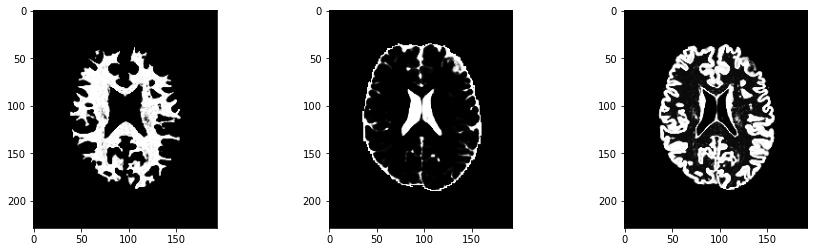

In [12]:
#display
plt.figure(figsize = [15,4])
plt.set_cmap('gray')

for i in range(3):
    # take only posteriors for class i
    post = proba[:,i]

    # reshape to the 3D image
    post2D = np.zeros_like(slice);
    post2D[ind]=post
    
    # display
    plt.subplot(1,3,i+1)
    plt.imshow(post2D)

## Exercise 3 (optional)

### Explore Gaussian Mixture model

In this exercise we will explore the theoretical concepts of Gaussian mixture models, including **likelihoods** and **posteriors**. We will used the `GaussianMixture` model that we fitted to perform segmentation of brain MRI in Exercise 2.

### Posterior probabilities

Probabilitic segmentation $p_{ik}$ gives us probability that pixel $i$ to belong the class $k$. These are in fact **posterior probabilities** $$p(z_i=k|x_i, \mu_k, \sigma_k,c_k)$$ for the labels $z_i$ given the intensity value $x_i$ and parameters $\mu_k, \sigma_k,c_k$ of the Gaussian intensity distribution for class $k$.

**Task 1.3:** Now let's plot how posterior probability for each class varies with pixel intensity value.  Fill in the missing code below to display the probability curves.

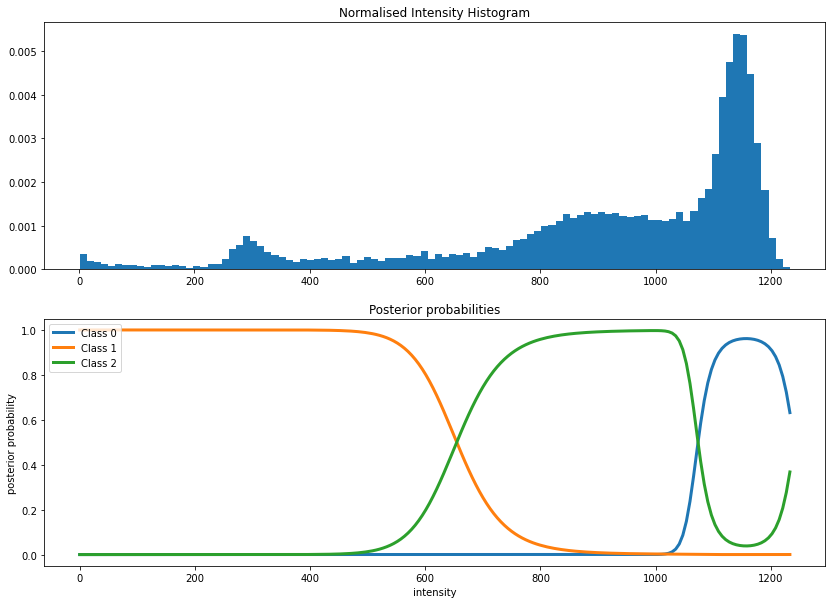

In [13]:
# pixel intensity value range
intensity_range = np.linspace(0, np.max(slice2),200)

# predict posterior probabilities for the intensity range
# do not forget to reshape the intensity range to 2D array for the prediction
proba_curves = model.predict_proba(intensity_range.reshape(-1,1))

# display
plt.figure(figsize = [14,10])
# plot normalised histogram 
# normalisation is achieved by parameter density
plt.subplot(211)
_=plt.hist(slice2, bins = 100, density = True)
plt.title('Normalised Intensity Histogram')

# plot posterior probabilities in a for loop
plt.subplot(212)
for i in range(0,3):
    plt.plot(intensity_range,proba_curves[:,i], linewidth = 3, label = 'Class {}'.format(i))

# annotate the subplot
plt.title('Posterior probabilities')
plt.xlabel('intensity')
plt.ylabel('posterior probability')
plt.legend(loc = 'upper left')

### Class-dependent likelihood

Class-dependent likelihoods are modelled by Gaussian distributions scaled by the mixing proportions
$$p(x_i|z_i=k,\mu_k,\sigma_k, c_k)=G(x_i,\mu_k,\sigma_k)c_k$$ 

To display these distributions over the normalised histogram (notice parameter `density=True`) we need to extract the `means_`, `covariances_` and `weights_` from the fitted `model`. Then we need to calculate the Gaussian distributions for these parameters. To do that we use function `norm.pdf` from `scipy.stats` module. Finally these distributions need to be multiplied by the weights and plotted.

**Task 3.2:** Plot the Gaussian intensity distributions for each class $k$ over the normalised image histogrom. To do that, fill in the missing code below and run the cell.

Text(0.5, 1.0, 'Class specific likelihood functions')

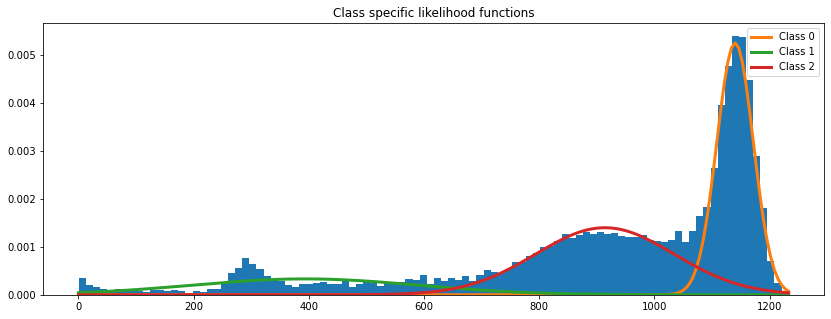

In [14]:
# to calculate gaussian distribution
from scipy.stats import norm

# get parameters of GMM
# use flatten to make 1D arrays

# means
m = model.means_.flatten()

# standard deviation
s = np.sqrt(model.covariances_).flatten()

# mixing proportions
w = model.weights_.flatten()

# display
plt.figure(figsize = [14,5])

# histogram
_=plt.hist(slice2, bins = 100, density = True)

# class-dependent likelihoods - Gaussian PDFs
for i in range(0,3):
    likelihood = w[i]*norm.pdf(intensity_range, m[i], s[i])
    plt.plot(intensity_range,likelihood, linewidth = 3, label = 'Class {}'.format(i))
plt.legend()
plt.title('Class specific likelihood functions')


### Likelihood

The likelihood for each pixel intensity $x_i$ given the Gaussian Mixture Model parameters $\phi = (\mu_k,\sigma_k,c_k),k=1,...,K$ can be evaluated as
$$p(x_i|\phi)=\sum_{k=1}^KG(x_i,\mu_k,\sigma_k)c_k $$

We can calculate this function by adding the class-dependent likelihoods together. Alternative is to use a function provided by `GaussianMixture` model `score_samples` that returns **log-likelihood**. 

**Task 4:** Plot the likelihood function for the whole intensity range over the normalised image histogram. To do that, first evaluate log-likelihood over the intensity range, then calculate the exponential using `np.exp` and then plot it.

Text(0.5, 1.0, 'Fitted likelihood function')

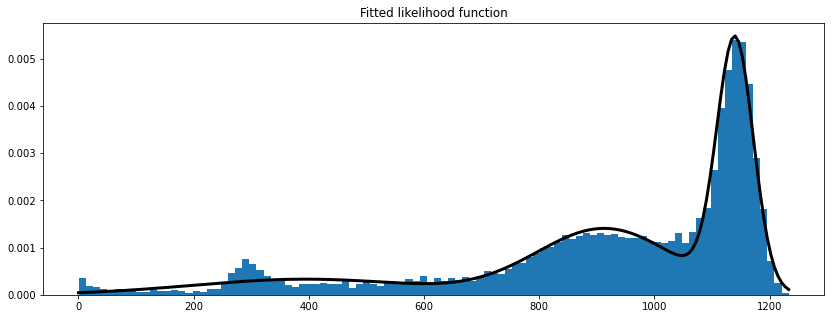

In [15]:
# Compare histogram with fitted Gaussian mixture likelihood function
plt.figure(figsize = [14,5])
# histogram
h2 = plt.hist(slice2, bins = 100, density = True)
# calculate likelihood
likelihood = np.exp(model.score_samples(intensity_range.reshape(-1,1)))
# plot likelihood
plt.plot(intensity_range, likelihood, linewidth = 3, c='k')
plt.title('Fitted likelihood function')